## Capstone Project - The Battle of Neighborhoods (Week 2)

In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

1. A full report consisting of all of the following components
2. A link to your Notebook on your Github repository pushed showing your code
3. Your choice of a presentation or blogpost

### Import Libraries

In [1]:
import json, requests
import os
import geopandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import folium

pd.options.display.max_rows = None
pd.options.display.max_columns = None

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


We proceed to import the Sandakan neighbourhood csv file which consists the places, names, location, latitude and longtitude.

### Sandakan neighbourhood data description:

**Number** = Index number

**Name of neighbourhood** = Neighbourhood Names

**Area** = Area in acres

**Residential units** = Number of residential homes

**Location** = Location of neighbourhood

**Latitude** = Latitude coordinates

**Longtitude** = Longtitude coordinates

### Load data

In [2]:
df = pd.read_csv('sandakan.csv', index_col="Number")

In [3]:
df.head()

,Neighbourhood,Area,Residential Units,Location,Latitude,Longtitude
Number,,,,,,
1,Airport,41.630,649,"Batu 7, Jalan Lapangan Terbang",5.898035,118.061205
2,Anggerik,15.828,408,Jalan Lintas Sibuga,5.861322,118.037246
3,Astana Height,100.270,483,"Batu 1, Jalan Lalang",5.853584,118.116925
4,Berhala Darat,23.200,192,Jalan Sim-Sim,5.850209,118.130763
5,Bukit Permai,270.890,4142,"Batu 3 1/2, Jalan Utara",5.864637,118.084975


In [4]:
df.tail()

,Neighbourhood,Area,Residential Units,Location,Latitude,Longtitude
Number,,,,,,
69,Vista,10.70,172,"Batu 7, Jalan Lintas Sibuga",5.858524,118.041216
70,Wijaya,6.03,196,"Batu 7, Jalan Labuk",5.884665,118.045531
71,Wira,9.93,312,Jalan Sibuga,5.849188,118.042680
72,Yeng Seng,11.75,125,"Batu 2 1/2, Jalan Utara",5.858835,118.098056
73,Yii Villa,1.30,100,Jalan Bulis Sim-Sim,5.854239,118.126795


In [5]:
df.shape

(73, 6)

The dataset consists of 73 rows and 6 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 73
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Neighbourhood      73 non-null     object 
 1   Area               72 non-null     float64
 2   Residential Units  73 non-null     int64  
 3   Location           70 non-null     object 
 4   Latitude           68 non-null     float64
 5   Longtitude         68 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.0+ KB


In [7]:
df.isnull().sum()  #Count NaN values

Neighbourhood        0
Area                 1
Residential Units    0
Location             3
Latitude             5
Longtitude           5
dtype: int64

Since we need to explore and plot neighbourhoods, I decided to drop NaNs for Latitude and Longtitude

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(65, 6)

In [10]:
df.head()

,Neighbourhood,Area,Residential Units,Location,Latitude,Longtitude
Number,,,,,,
1,Airport,41.630,649,"Batu 7, Jalan Lapangan Terbang",5.898035,118.061205
2,Anggerik,15.828,408,Jalan Lintas Sibuga,5.861322,118.037246
3,Astana Height,100.270,483,"Batu 1, Jalan Lalang",5.853584,118.116925
4,Berhala Darat,23.200,192,Jalan Sim-Sim,5.850209,118.130763
5,Bukit Permai,270.890,4142,"Batu 3 1/2, Jalan Utara",5.864637,118.084975


In [11]:
df.reset_index()

,Number,Neighbourhood,Area,Residential Units,Location,Latitude,Longtitude
0,1,Airport,41.630,649,"Batu 7, Jalan Lapangan Terbang",5.898035,118.061205
1,2,Anggerik,15.828,408,Jalan Lintas Sibuga,5.861322,118.037246
2,3,Astana Height,100.270,483,"Batu 1, Jalan Lalang",5.853584,118.116925
3,4,Berhala Darat,23.200,192,Jalan Sim-Sim,5.850209,118.130763
4,5,Bukit Permai,270.890,4142,"Batu 3 1/2, Jalan Utara",5.864637,118.084975
5,6,Bunga Matahari,11.880,172,"Batu 4, Jalan Utara",5.865810,118.075874
6,7,Casa San Uno,38.890,307,"Batu 4, Jalan Utara",5.865233,118.072556
7,8,Chrysanthemum,11.400,154,"Batu 1 1/2, Jalan Utara",5.857480,118.105876
8,9,Damai & Sri Taman,21.670,123,"Batu 4, Jalan Utara",5.858482,118.078921
9,10,Evergreen,23.990,48,"Batu 6, Jalan Utara",5.873464,118.057834


Drop number and location columns from dataframe

In [12]:
df = df[['Neighbourhood','Area','Residential Units','Latitude','Longtitude']]

In [13]:
df.reset_index(drop="Number", inplace=True)

In [14]:
#Save a cleaned csv file for backup

#df.to_csv('skanclean.csv', index=False)

### Data Visualization

In [15]:
df.head()

,Neighbourhood,Area,Residential Units,Latitude,Longtitude
0,Airport,41.630,649,5.898035,118.061205
1,Anggerik,15.828,408,5.861322,118.037246
2,Astana Height,100.270,483,5.853584,118.116925
3,Berhala Darat,23.200,192,5.850209,118.130763
4,Bukit Permai,270.890,4142,5.864637,118.084975


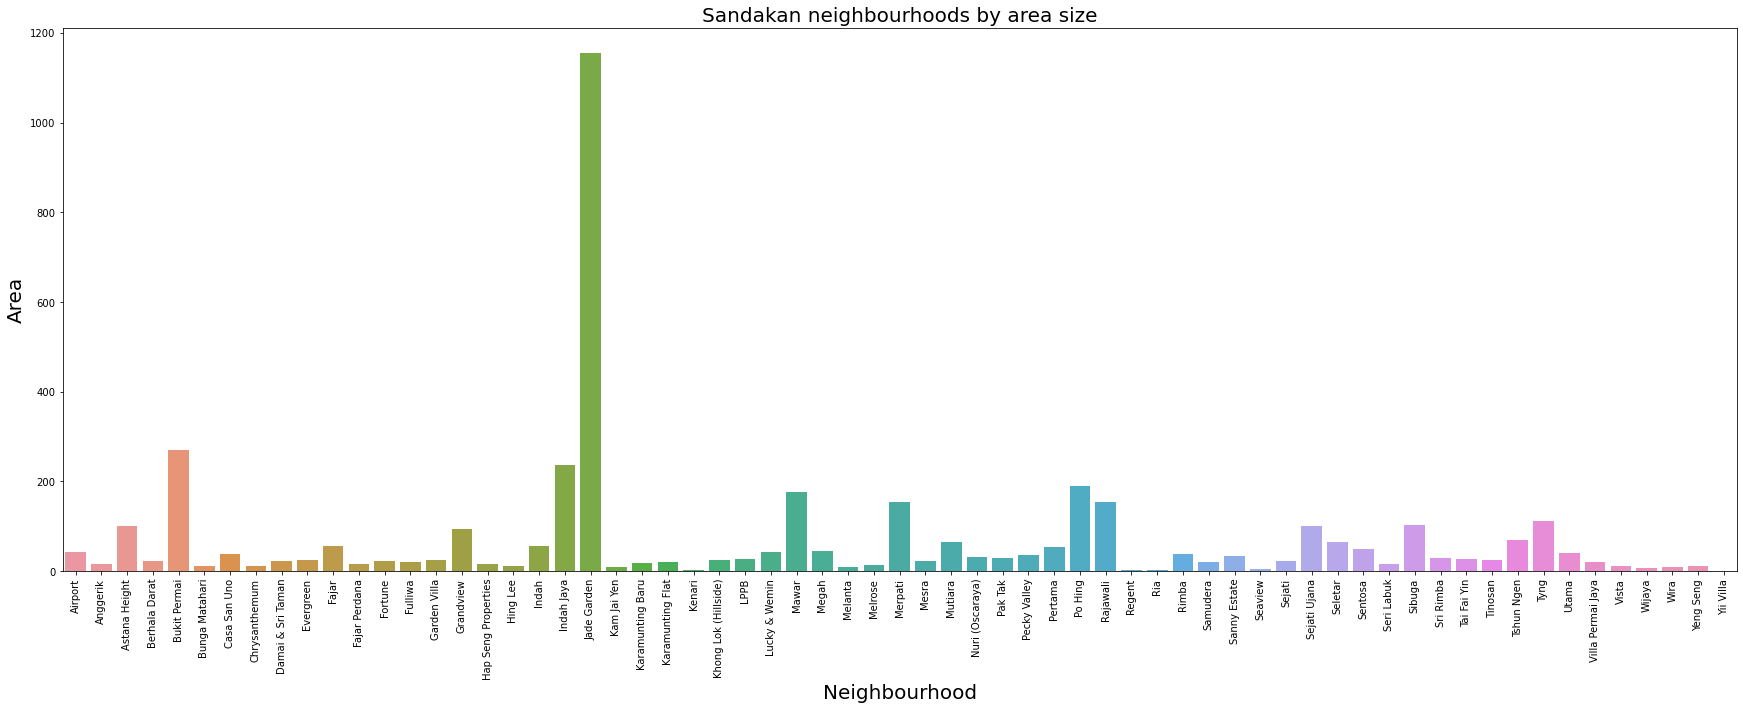

In [16]:
plt.figure(figsize=(30,10))
plt.title('Sandakan neighbourhoods by area size', fontsize=20)
plt.xlabel('xlabel', fontsize=20)
plt.ylabel('ylabel', fontsize=20)
plt.xticks(rotation='vertical')
sns.barplot(x=df.Neighbourhood,y=df.Area)
plt.show()

**Observation: Jade Garden has largest area**

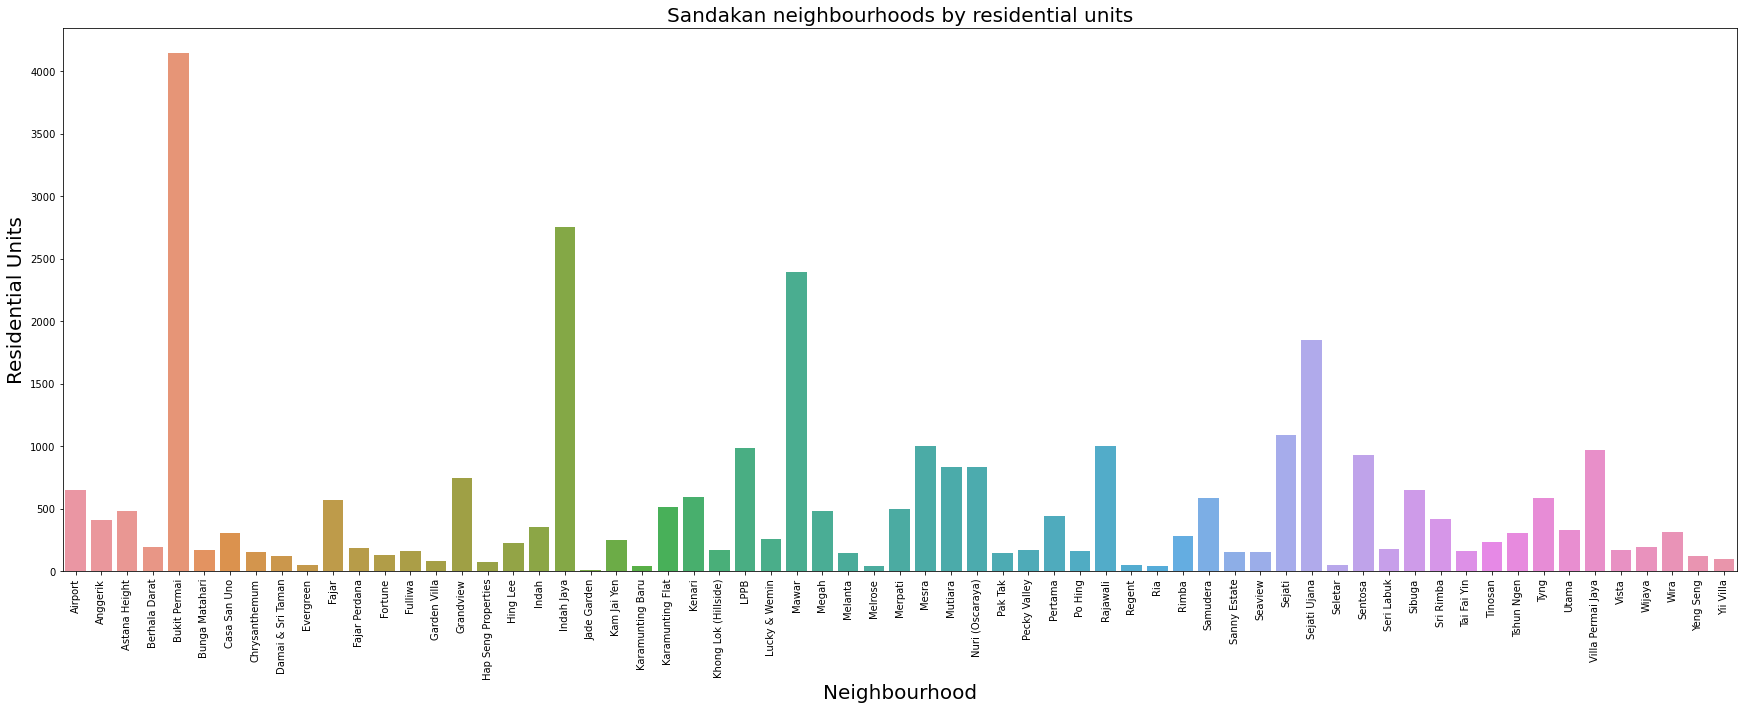

In [17]:
plt.figure(figsize=(30,10))
plt.title('Sandakan neighbourhoods by residential units', fontsize=20)
plt.xlabel('xlabel', fontsize=20)
plt.ylabel('ylabel', fontsize=20)
plt.xticks(rotation='vertical')
sns.barplot(x=df.Neighbourhood,y=df['Residential Units'])
plt.show()

**Observation: Bukit Permai has most number of residential units**

Plotting pairplots to check for any correlation

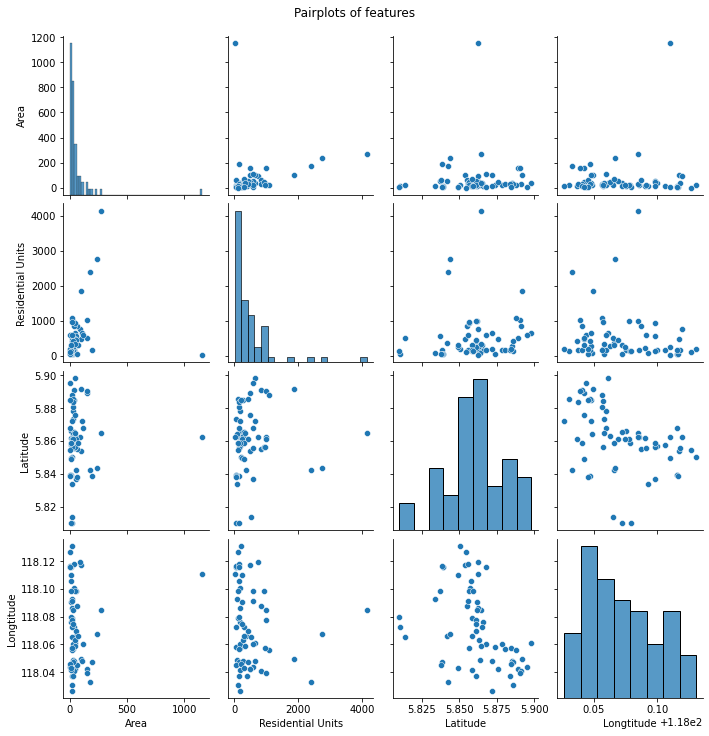

In [18]:
sns.pairplot(df)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

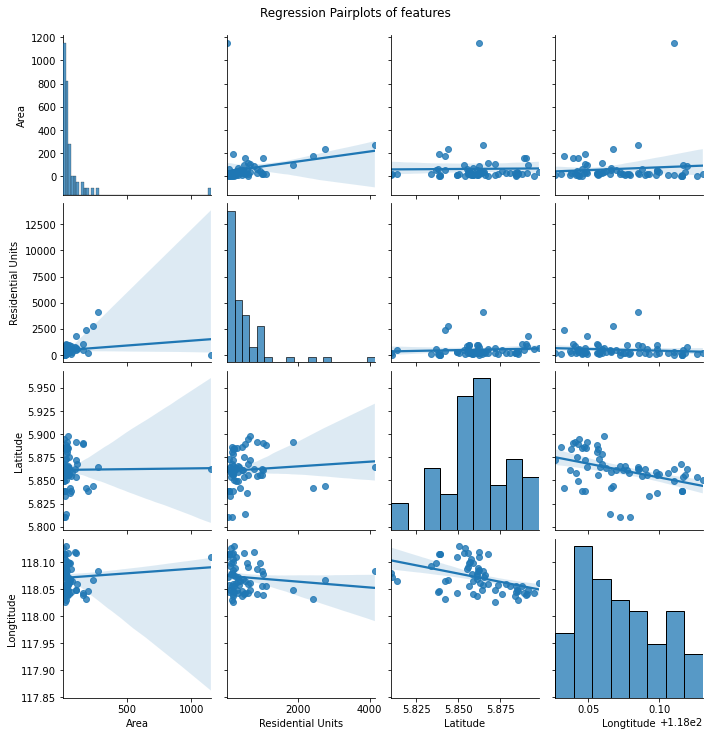

In [19]:
sns.pairplot(df, kind='reg')
plt.suptitle('Regression Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

**Observation: There seems to be a small linear relationship between Area and Residential Units**

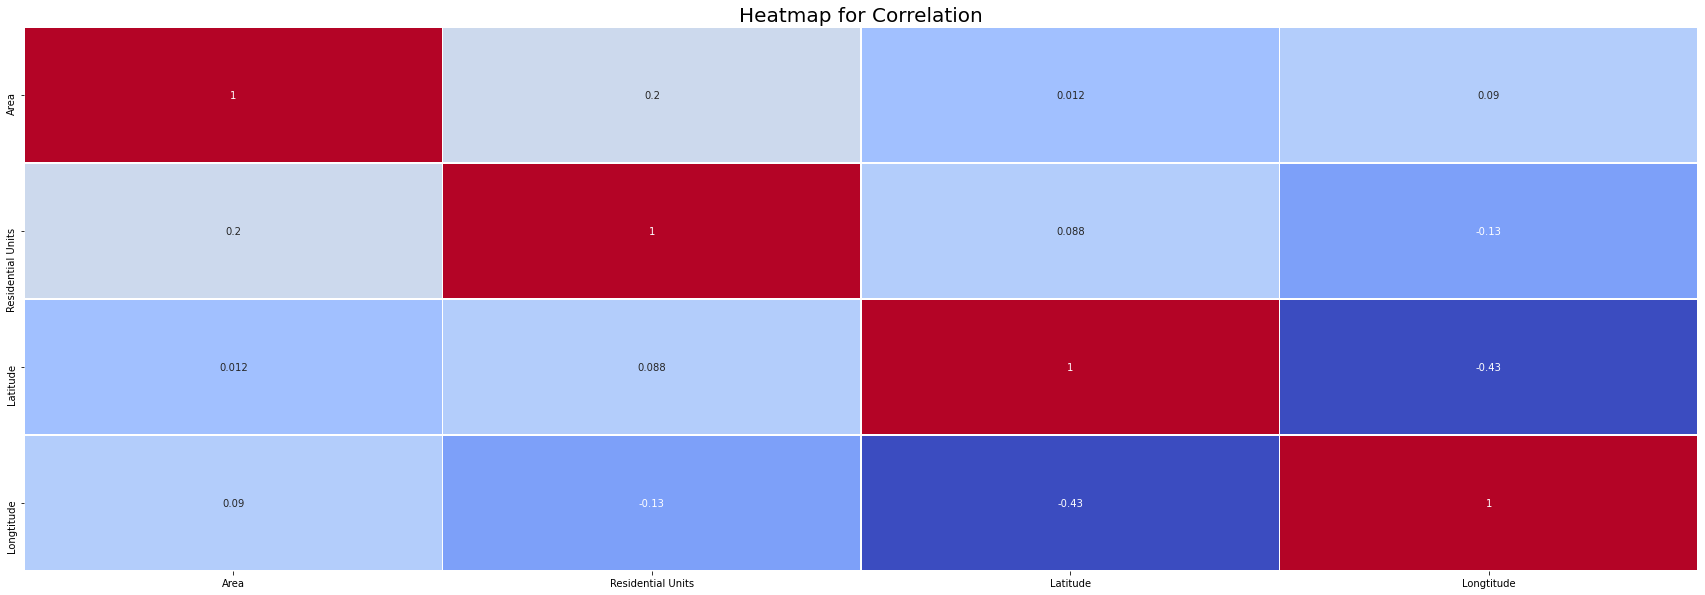

In [20]:
plt.figure(figsize=(30,10))
plt.title('Heatmap for Correlation', fontsize=20)

sns.heatmap(df.corr(), annot=True, linewidth = 0.5, cmap='coolwarm', cbar=False)
plt.show()

**Observation: From heatmap diagram only 0.2 correlation coeffient between Area and Residential Units**

### Create maps to look at all neighbourhoods

In [21]:
#Load the cleaned csv file

df = pd.read_csv("skanclean.csv")

In [22]:
#Get the lat and long coordinates for Sandakan
address = 'Sandakan'

geolocator = Nominatim(user_agent="foursquare_agent")

location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

5.8391337 118.1158919


In [23]:
#Sandakan Map
map = folium.Map(location=[latitude,longitude], zoom_start=12)
map

<img src="map23.jpg">

In [24]:
#Segment suburbs coordinates

df_suburbs = df[['Latitude','Longtitude']]

In [25]:
df_suburbs.head()

,Latitude,Longtitude
0,5.898035,118.061205
1,5.861322,118.037246
2,5.853584,118.116925
3,5.850209,118.130763
4,5.864637,118.084975


In [26]:
df_suburbs.shape

(65, 2)

In [27]:
suburbs_list = df_suburbs.values.tolist()

In [28]:
suburbs_list_size = len(suburbs_list)

In [29]:
suburbs_list_size

65

In [30]:
#Add Markers
for point in range(0,suburbs_list_size):
    folium.Marker(suburbs_list[point]).add_to(map)

In [31]:
map

<img src="map31.jpg">

In [32]:
#Add Markers with Popup
for point in range(0,suburbs_list_size):
    folium.Marker(suburbs_list[point], popup=df['Neighbourhood'][point]).add_to(map)

In [33]:
map

<img src="map33.jpg">

### Focus on Mile 4 to Mile 6 neighbourhoods

In [34]:
df1 = pd.read_csv("segment.csv")

In [35]:
df1

,Neighbourhood,Area,Residential Units,Latitude,Longtitude
0,Bunga Matahari,11.880,172,5.865810,118.075874
1,Casa San Uno,38.890,307,5.865233,118.072556
2,Damai & Sri Taman,21.670,123,5.858482,118.078921
3,Evergreen,23.990,48,5.873464,118.057834
4,Garden Villa,25.760,82,5.863280,118.048945
5,Indah,56.270,356,5.842067,118.066095
6,Indah Jaya,235.680,2752,5.843796,118.067200
7,Lucky & Wemin,43.544,260,5.863112,118.062768
8,Mesra,23.180,1000,5.861271,118.077664
9,Pertama,53.320,438,5.861339,118.069276


In [36]:
df1.shape

(14, 5)

In [37]:
address = 'Sandakan'

geolocator = Nominatim(user_agent="foursquare_agent")

location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

5.8391337 118.1158919


In [38]:
#Sandakan Map
map1 = folium.Map(location=[latitude,longitude], zoom_start=12)
map1

<img src="map38.jpg">

In [39]:
#Segment Mile 4 to Mile 6 suburbs coordinates

df1_suburbs = df1[['Latitude','Longtitude']]

In [40]:
df1_suburbs

,Latitude,Longtitude
0,5.865810,118.075874
1,5.865233,118.072556
2,5.858482,118.078921
3,5.873464,118.057834
4,5.863280,118.048945
5,5.842067,118.066095
6,5.843796,118.067200
7,5.863112,118.062768
8,5.861271,118.077664
9,5.861339,118.069276


In [41]:
df1_suburbs.shape

(14, 2)

In [42]:
suburbs1_list = df1_suburbs.values.tolist()

In [43]:
suburbs1_list

[[5.8658095, 118.0758739],
 [5.8652331, 118.0725562],
 [5.8584821, 118.0789209],
 [5.8734638, 118.0578338],
 [5.8632801, 118.0489446],
 [5.8420670999999995, 118.06609499999999],
 [5.843796, 118.06720049999998],
 [5.8631125, 118.0627675],
 [5.8612709, 118.07766389999999],
 [5.8613392, 118.06927649999999],
 [5.8610315, 118.0745175],
 [5.85872755, 118.0658041],
 [5.8676695, 118.0599967],
 [5.864600599999999, 118.05856909999999]]

In [44]:
suburbs1_list_size = len(suburbs1_list)

In [45]:
suburbs1_list_size

14

In [46]:
#Add Markers with Popup
for point in range(0,suburbs1_list_size):
    folium.Marker(suburbs1_list[point], popup=df1['Neighbourhood'][point]).add_to(map1)

In [47]:
map1

<img src="map47.jpg">

### Using Foursquare API

**Explore Neighborhoods with that focused segment**

In [48]:
#define our Foursquare credentials and version
CLIENT_ID = 'G5ETWK2SC3RW405O1EELGLJCOFWTL2WGQJ5WXKJFB5NZST3Z' # your Foursquare ID
CLIENT_SECRET = 'F4LEZEDAHXLETDPUPFQCTMII5LIQL4J34L2EZGGUYGVOKF4C' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 15

In [49]:
neighborhoods_subset = df1[['Neighbourhood','Latitude','Longtitude']]

In [50]:
neighborhoods_subset

,Neighbourhood,Latitude,Longtitude
0,Bunga Matahari,5.865810,118.075874
1,Casa San Uno,5.865233,118.072556
2,Damai & Sri Taman,5.858482,118.078921
3,Evergreen,5.873464,118.057834
4,Garden Villa,5.863280,118.048945
5,Indah,5.842067,118.066095
6,Indah Jaya,5.843796,118.067200
7,Lucky & Wemin,5.863112,118.062768
8,Mesra,5.861271,118.077664
9,Pertama,5.861339,118.069276


In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [52]:
target_venues = getNearbyVenues(names=neighborhoods_subset['Neighbourhood'],
                                   latitudes=neighborhoods_subset['Latitude'],
                                   longitudes=neighborhoods_subset['Longtitude']
                                  )

Bunga Matahari
Casa San Uno
Damai & Sri Taman
Evergreen
Garden Villa
Indah
Indah Jaya
Lucky & Wemin
Mesra
Pertama
Tinosan
Tshun Ngen
Tyng
Utama


In [53]:
print(target_venues.shape)
target_venues

(130, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bunga Matahari,5.865810,118.075874,Sunflower Mini Market Taman Bunga Matahari,5.865544,118.076034,Convenience Store
1,Bunga Matahari,5.865810,118.075874,"pizza hut,giant sandakan",5.866178,118.074039,Fast Food Restaurant
2,Bunga Matahari,5.865810,118.075874,Lee Yuan Chinese Restaurant,5.864253,118.073965,Chinese Restaurant
3,Bunga Matahari,5.865810,118.075874,BB yusri Lim,5.866836,118.072678,BBQ Joint
4,Bunga Matahari,5.865810,118.075874,Taman Tinosan,5.862603,118.073679,Other Great Outdoors
5,Bunga Matahari,5.865810,118.075874,Lubuk,5.870108,118.075571,Outdoors & Recreation
6,Casa San Uno,5.865233,118.072556,BB yusri Lim,5.866836,118.072678,BBQ Joint
7,Damai & Sri Taman,5.858482,118.078921,Servay Supermarket,5.858409,118.078295,Grocery Store
8,Damai & Sri Taman,5.858482,118.078921,Bandar Kim Fung 金凤市,5.856492,118.078332,Town
9,Damai & Sri Taman,5.858482,118.078921,Novelty Cafe & Cake House,5.857198,118.079499,Bakery


In [54]:
#Save a copy of csv
#target_venues.to_csv("foursq.csv",index=False)

In [55]:
target_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bunga Matahari,6,6,6,6,6,6
Casa San Uno,1,1,1,1,1,1
Damai & Sri Taman,15,15,15,15,15,15
Evergreen,3,3,3,3,3,3
Garden Villa,15,15,15,15,15,15
Indah,11,11,11,11,11,11
Indah Jaya,6,6,6,6,6,6
Lucky & Wemin,1,1,1,1,1,1
Mesra,15,15,15,15,15,15


In [56]:
print('There are {} uniques categories.'.format(len(target_venues['Venue Category'].unique())))

There are 54 uniques categories.


### Analyze Each Neighborhood

In [57]:
# one hot encoding
target_onehot = pd.get_dummies(target_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
target_onehot['Neighborhood'] = target_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [target_onehot.columns[-1]] + list(target_onehot.columns[:-1])
target_onehot = target_onehot[fixed_columns]

target_onehot.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bakery,Baseball Stadium,Bed & Breakfast,Beer Garden,Bistro,Breakfast Spot,Bubble Tea Shop,Butcher,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Diner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,Golf Course,Grocery Store,Gym,Hakka Restaurant,Halal Restaurant,Hotel,Indian Restaurant,Indonesian Restaurant,Korean Restaurant,Lounge,Malay Restaurant,Market,Music Venue,Noodle House,Other Great Outdoors,Outdoors & Recreation,Photography Studio,Pizza Place,Pub,Recreation Center,Restaurant,Seafood Restaurant,Sushi Restaurant,Town,Vegetarian / Vegan Restaurant,Wings Joint,Women's Store
0,Bunga Matahari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bunga Matahari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bunga Matahari,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bunga Matahari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bunga Matahari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
target_onehot.shape

(130, 55)

In [59]:
target_grouped = target_onehot.groupby('Neighborhood').mean().reset_index()
target_grouped

,Neighborhood,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bakery,Baseball Stadium,Bed & Breakfast,Beer Garden,Bistro,Breakfast Spot,Bubble Tea Shop,Butcher,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Diner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,Golf Course,Grocery Store,Gym,Hakka Restaurant,Halal Restaurant,Hotel,Indian Restaurant,Indonesian Restaurant,Korean Restaurant,Lounge,Malay Restaurant,Market,Music Venue,Noodle House,Other Great Outdoors,Outdoors & Recreation,Photography Studio,Pizza Place,Pub,Recreation Center,Restaurant,Seafood Restaurant,Sushi Restaurant,Town,Vegetarian / Vegan Restaurant,Wings Joint,Women's Store
0,Bunga Matahari,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Casa San Uno,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Damai & Sri Taman,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.133333,0.000000,0.000000,0.066667,0.066667,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000
3,Evergreen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Garden Villa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.066667,0.066667,0.000000,0.200000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.0,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000
5,Indah,0.090909,0.181818,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Indah Jaya,0.000000,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [60]:
target_grouped.shape

(14, 55)

In [61]:
# Print out top 5 venues for each neighbourhood
num_top_venues = 5

for hood in target_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = target_grouped[target_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bunga Matahari----
                   venue  freq
0  Outdoors & Recreation  0.17
1   Other Great Outdoors  0.17
2              BBQ Joint  0.17
3   Fast Food Restaurant  0.17
4     Chinese Restaurant  0.17


----Casa San Uno----
                  venue  freq
0             BBQ Joint   1.0
1      Asian Restaurant   0.0
2  Other Great Outdoors   0.0
3      Hakka Restaurant   0.0
4      Halal Restaurant   0.0


----Damai & Sri Taman----
               venue  freq
0      Deli / Bodega  0.13
1              Hotel  0.07
2      Grocery Store  0.07
3         Food Court  0.07
4  Convenience Store  0.07


----Evergreen----
              venue  freq
0       Golf Course  0.67
1               Gym  0.33
2      Noodle House  0.00
3  Hakka Restaurant  0.00
4  Halal Restaurant  0.00


----Garden Villa----
                venue  freq
0                Café  0.20
1     Bubble Tea Shop  0.07
2    Hakka Restaurant  0.07
3   Indian Restaurant  0.07
4  Photography Studio  0.07


----Indah----
               

In [62]:
#Create a function to return common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
#Sort each neighbourhood with top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = target_grouped['Neighborhood']

for ind in np.arange(target_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(target_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,Chinese Restaurant,BBQ Joint,Fast Food Restaurant,Outdoors & Recreation,Other Great Outdoors,Convenience Store,Women's Store,Food Court,Fish & Chips Shop,Electronics Store
1,Casa San Uno,BBQ Joint,Women's Store,Chinese Restaurant,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store
2,Damai & Sri Taman,Deli / Bodega,Fruit & Vegetable Store,Fast Food Restaurant,Chinese Restaurant,Food Court,Bubble Tea Shop,Hotel,Electronics Store,Grocery Store,Bakery
3,Evergreen,Golf Course,Gym,Women's Store,Fruit & Vegetable Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store
4,Garden Villa,Café,Photography Studio,Indian Restaurant,Korean Restaurant,Lounge,Bubble Tea Shop,Breakfast Spot,Bistro,Beer Garden,Coffee Shop
5,Indah,Athletics & Sports,Asian Restaurant,Recreation Center,Chinese Restaurant,Food Truck,Indian Restaurant,Department Store,Coffee Shop,Baseball Stadium,Grocery Store
6,Indah Jaya,Athletics & Sports,Baseball Stadium,Recreation Center,Department Store,Indian Restaurant,Chinese Restaurant,Women's Store,Coffee Shop,Food Court,Fish & Chips Shop
7,Lucky & Wemin,Halal Restaurant,Women's Store,Chinese Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store,Deli / Bodega
8,Mesra,Electronics Store,Pizza Place,Convenience Store,Café,Food Court,Music Venue,Other Great Outdoors,Department Store,Chinese Restaurant,Grocery Store
9,Pertama,Furniture / Home Store,Chinese Restaurant,Noodle House,Austrian Restaurant,BBQ Joint,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner


### Clustering Neighborhoods - Using K-means method

In [64]:
# set number of clusters
kclusters = 5

target_grouped_clustering = target_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(target_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15] 

array([1, 0, 1, 2, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1])

In [65]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

target_merged = neighborhoods_subset

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
target_merged = target_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

target_merged.head() # check the last columns!

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,5.865810,118.075874,1,Chinese Restaurant,BBQ Joint,Fast Food Restaurant,Outdoors & Recreation,Other Great Outdoors,Convenience Store,Women's Store,Food Court,Fish & Chips Shop,Electronics Store
1,Casa San Uno,5.865233,118.072556,0,BBQ Joint,Women's Store,Chinese Restaurant,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store
2,Damai & Sri Taman,5.858482,118.078921,1,Deli / Bodega,Fruit & Vegetable Store,Fast Food Restaurant,Chinese Restaurant,Food Court,Bubble Tea Shop,Hotel,Electronics Store,Grocery Store,Bakery
3,Evergreen,5.873464,118.057834,2,Golf Course,Gym,Women's Store,Fruit & Vegetable Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store
4,Garden Villa,5.863280,118.048945,1,Café,Photography Studio,Indian Restaurant,Korean Restaurant,Lounge,Bubble Tea Shop,Breakfast Spot,Bistro,Beer Garden,Coffee Shop


In [66]:
target_merged #Do a check for all

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,5.865810,118.075874,1,Chinese Restaurant,BBQ Joint,Fast Food Restaurant,Outdoors & Recreation,Other Great Outdoors,Convenience Store,Women's Store,Food Court,Fish & Chips Shop,Electronics Store
1,Casa San Uno,5.865233,118.072556,0,BBQ Joint,Women's Store,Chinese Restaurant,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store
2,Damai & Sri Taman,5.858482,118.078921,1,Deli / Bodega,Fruit & Vegetable Store,Fast Food Restaurant,Chinese Restaurant,Food Court,Bubble Tea Shop,Hotel,Electronics Store,Grocery Store,Bakery
3,Evergreen,5.873464,118.057834,2,Golf Course,Gym,Women's Store,Fruit & Vegetable Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store
4,Garden Villa,5.863280,118.048945,1,Café,Photography Studio,Indian Restaurant,Korean Restaurant,Lounge,Bubble Tea Shop,Breakfast Spot,Bistro,Beer Garden,Coffee Shop
5,Indah,5.842067,118.066095,1,Athletics & Sports,Asian Restaurant,Recreation Center,Chinese Restaurant,Food Truck,Indian Restaurant,Department Store,Coffee Shop,Baseball Stadium,Grocery Store
6,Indah Jaya,5.843796,118.067200,1,Athletics & Sports,Baseball Stadium,Recreation Center,Department Store,Indian Restaurant,Chinese Restaurant,Women's Store,Coffee Shop,Food Court,Fish & Chips Shop
7,Lucky & Wemin,5.863112,118.062768,3,Halal Restaurant,Women's Store,Chinese Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store,Deli / Bodega
8,Mesra,5.861271,118.077664,1,Electronics Store,Pizza Place,Convenience Store,Café,Food Court,Music Venue,Other Great Outdoors,Department Store,Chinese Restaurant,Grocery Store
9,Pertama,5.861339,118.069276,4,Furniture / Home Store,Chinese Restaurant,Noodle House,Austrian Restaurant,BBQ Joint,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner


In [67]:
#target_merged.drop(index=1, inplace=True) #Drop Casa San Uno as there are NaNs

In [68]:
#target_merged

In [69]:
target_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighbourhood           14 non-null     object 
 1   Latitude                14 non-null     float64
 2   Longtitude              14 non-null     float64
 3   Cluster Labels          14 non-null     int32  
 4   1st Most Common Venue   14 non-null     object 
 5   2nd Most Common Venue   14 non-null     object 
 6   3rd Most Common Venue   14 non-null     object 
 7   4th Most Common Venue   14 non-null     object 
 8   5th Most Common Venue   14 non-null     object 
 9   6th Most Common Venue   14 non-null     object 
 10  7th Most Common Venue   14 non-null     object 
 11  8th Most Common Venue   14 non-null     object 
 12  9th Most Common Venue   14 non-null     object 
 13  10th Most Common Venue  14 non-null     object 
dtypes: float64(2), int32(1), object(11)
memory u

In [70]:
#Convert float to int for Cluster Labels
#target_merged['Cluster Labels'] = target_merged['Cluster Labels'].astype(int) 

In [71]:
#target_merged

In [72]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(target_merged['Latitude'], target_merged['Longtitude'], target_merged['Neighbourhood'], target_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

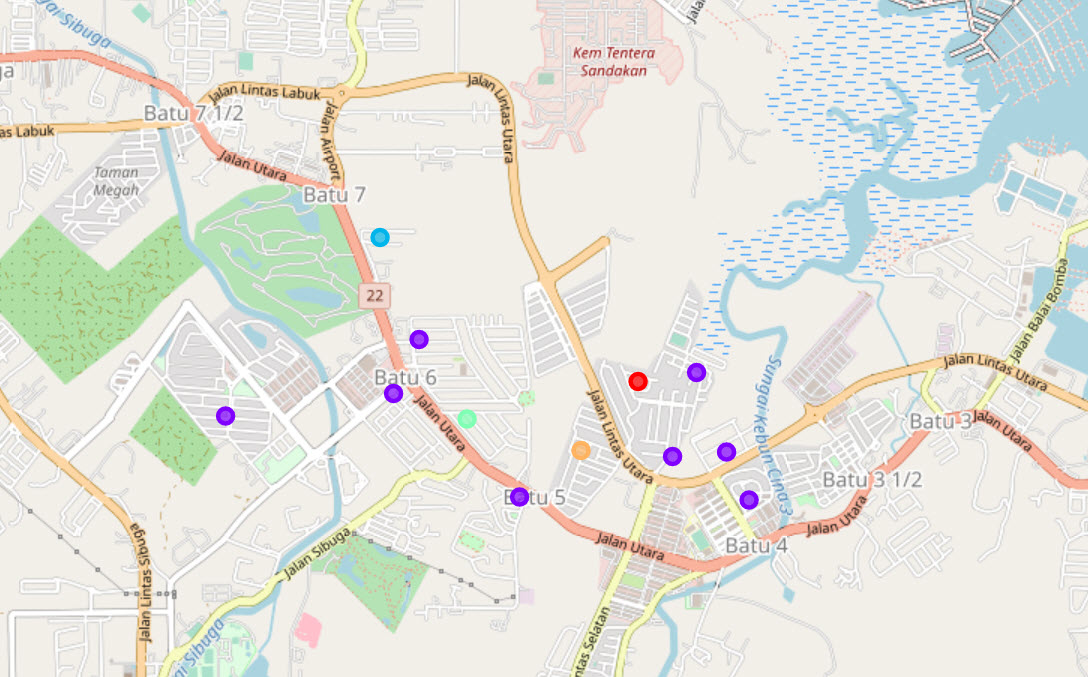

**LEGEND**
<ul>
<li>Red color =  Cluster 0</li>
<li>Violet color =  Cluster 1</li>
<li>Light Blue color =  Cluster 2</li>
<li>Green color =  Cluster 3</li>
<li>Orange color =  Cluster 4</li>
</ul>

### Display each cluster

In [73]:
target_merged.loc[target_merged['Cluster Labels'] == 0]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Casa San Uno,5.865233,118.072556,0,BBQ Joint,Women's Store,Chinese Restaurant,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store


In [74]:
target_merged.loc[target_merged['Cluster Labels'] == 1]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,5.865810,118.075874,1,Chinese Restaurant,BBQ Joint,Fast Food Restaurant,Outdoors & Recreation,Other Great Outdoors,Convenience Store,Women's Store,Food Court,Fish & Chips Shop,Electronics Store
2,Damai & Sri Taman,5.858482,118.078921,1,Deli / Bodega,Fruit & Vegetable Store,Fast Food Restaurant,Chinese Restaurant,Food Court,Bubble Tea Shop,Hotel,Electronics Store,Grocery Store,Bakery
4,Garden Villa,5.863280,118.048945,1,Café,Photography Studio,Indian Restaurant,Korean Restaurant,Lounge,Bubble Tea Shop,Breakfast Spot,Bistro,Beer Garden,Coffee Shop
5,Indah,5.842067,118.066095,1,Athletics & Sports,Asian Restaurant,Recreation Center,Chinese Restaurant,Food Truck,Indian Restaurant,Department Store,Coffee Shop,Baseball Stadium,Grocery Store
6,Indah Jaya,5.843796,118.067200,1,Athletics & Sports,Baseball Stadium,Recreation Center,Department Store,Indian Restaurant,Chinese Restaurant,Women's Store,Coffee Shop,Food Court,Fish & Chips Shop
8,Mesra,5.861271,118.077664,1,Electronics Store,Pizza Place,Convenience Store,Café,Food Court,Music Venue,Other Great Outdoors,Department Store,Chinese Restaurant,Grocery Store
10,Tinosan,5.861032,118.074517,1,Chinese Restaurant,Café,Pub,Malay Restaurant,Indian Restaurant,Convenience Store,Noodle House,Bubble Tea Shop,Bed & Breakfast,Diner
11,Tshun Ngen,5.858728,118.065804,1,Chinese Restaurant,Asian Restaurant,Noodle House,Fish & Chips Shop,Grocery Store,Food Truck,Fruit & Vegetable Store,Vegetarian / Vegan Restaurant,Baseball Stadium,Bed & Breakfast
12,Tyng,5.867669,118.059997,1,Asian Restaurant,Chinese Restaurant,Noodle House,Hotel,Cupcake Shop,Coffee Shop,Market,Butcher,Sushi Restaurant,Bakery
13,Utama,5.864601,118.058569,1,Malay Restaurant,Women's Store,Noodle House,Café,Chinese Restaurant,Coffee Shop,Cupcake Shop,Department Store,Fast Food Restaurant,Indian Restaurant


In [75]:
target_merged.loc[target_merged['Cluster Labels'] == 2]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Evergreen,5.873464,118.057834,2,Golf Course,Gym,Women's Store,Fruit & Vegetable Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store


In [76]:
target_merged.loc[target_merged['Cluster Labels'] == 3]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Lucky & Wemin,5.863112,118.062768,3,Halal Restaurant,Women's Store,Chinese Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Department Store,Deli / Bodega


In [77]:
target_merged.loc[target_merged['Cluster Labels'] == 4]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Pertama,5.861339,118.069276,4,Furniture / Home Store,Chinese Restaurant,Noodle House,Austrian Restaurant,BBQ Joint,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner


###  Results and Discussion

The clustering results gave the most number of neighbourhoods are **cluster 1**. Startup Businesses who are keen in setting up any businesses can refer to the clustering results and what sort of businesses are there.

Business people need to factor in costs like rental, utilities, land prices, transportation, labor etc before setting any businesses.

To recap, we collected data from relevant websites and merged them into a single csv file. Some data exploration were performed to look for any patterns amongst the features.

Then we decided to focus on Mile 4 to Mile 6 neighbourhood areas since majority of them are concentrated there.

We mapped these locations using Folium. We used Foursquare API to get the common venues visited by people who live there.

K-Means clustering is applied to cluster these neighbourhoods to five clusters and the result will give new business owners to analyze what sort of opportunities available.


### Conclusion

The purpose of this project is to explore business opportunities in Sandakan neighbourhoods. Using clustering methods, we can identify suitable venues which can be considered by business people.